# IRWA Assignment 3 - Classification of Movie Data using the IMDb reviews




Group Members:

1. IT18054378 - Wickramaarachchi W.A.T. 

2. IT18032116 - Bandara K.B.S.K.

3. IT18082234 - Udishan R.P.I.
	
	


Description: 

Sentiment analysis is the process of determining whether a piece of writing is positive or negative. By using sentiment analysis we can predict people's views on things like movies, books or games by assigning positive and  negative polarities to opinions. 
For this classification we have used an IMDb movie review dataset .

Link to the dataset:  https://drive.google.com/file/d/1F7XxPIbZwgBDExZ30sTUz5HoiUx7HN5P/view?usp=sharing

# Data Pre-processing

In [1]:
#Importing libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import seaborn as sns
import collections
from wordcloud import WordCloud

In [2]:
#Import the csv to a dataframe
data = pd.read_csv("C:/Users/Thathi/Downloads/IMDBDataset.csv")

#Printing the dataset
print(data.shape)
print(data.head(10))


(50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive


In [3]:
#Check for null values in columns
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [4]:
#Converting sentiment data labels to binary (Positive = 1, Negative = 0)

lb = LabelBinarizer()
data.sentiment = lb.fit_transform(data.sentiment)

data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [5]:
#Function to remove html tags
def remove_html_tags(text):
    soup = 4(text, "html.parser")
    text = soup.get_text()
    return text

#Applying the function on data.review column
data['review'] = data['review'].apply(remove_html_tags)

#Print cleaned data
print(data.review)

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


In [6]:
#A list of most common contractions
contractions = { 
"aren't": "are not / am not",
"can't": "cannot",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"there's": "there is",
"haven't": "have not",
"I'll": "I shall / I will",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'll": "it shall / it will",
"it's": "it has / it is",
"let's": "let us",
"that's": "that has / that is",
"wasn't": "was not",
"we'll": "we will",
"we're": "we are",
"weren't": "were not",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"where's": "where has / where is",
"who's": "who is",
"won't": "will not",
"you'll": "you will",
"you're": "you are",
"you've": "you have"
}

In [7]:
contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))

#Function to expand contractions
def expand_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)


#Applying the function on data.review column
data['review'] = data['review'].apply(expand_contractions)


#Print cleaned data
print(data.review)

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there is a family where a little boy...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I am going to have to disagree with the previo...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


Tokenize

In [8]:
#Tokenizing reviews
def tokenize_reviews(text):
    tokens = word_tokenize(text)
    tokenized_text = ' '.join(tokens)    
    return tokenized_text

#Applying the function on data.review column
data['review'] = data['review'].apply(tokenize_reviews)

#Print tokenized data
print(data.review)

0        One of the other reviewers has mentioned that ...
1        A wonderful little production . The filming te...
2        I thought this was a wonderful way to spend ti...
3        Basically there is a family where a little boy...
4        Petter Mattei 's `` Love in the Time of Money ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot , bad dialogue , bad acting , idiotic...
49997    I am a Catholic taught in parochial elementary...
49998    I am going to have to disagree with the previo...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


Normalization methods

In [9]:
#Function to expand contractions
def make_lowercase(text):
    text= ' '.join([word.lower() for word in text.split()])
    return text

#Applying the function on review column
data['review'] = data['review'].apply(make_lowercase)

#Print lower cased data
print(data.review)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production . the filming te...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter mattei 's `` love in the time of money ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot , bad dialogue , bad acting , idiotic...
49997    i am a catholic taught in parochial elementary...
49998    i am going to have to disagree with the previo...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object


In [10]:
#Function to remove special characters
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-z0-9\s]','',text)
    return text

#Applying the function on review column
data['review']=data['review'].apply(remove_special_characters)

#Print cleaned data
print(data.review)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production  the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter mattei s `` love in the time of money  ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot  bad dialogue  bad acting  idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i am going to have to disagree with the previo...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object


In [11]:
#Function to remove punctuation marks
def remove_punctuations(text):
    text = re.sub(r'[^\w\s]','',text)
    return text


#Applying function on review column
data['review'] = data['review'].apply(remove_punctuations)

#Print cleaned data
print(data.review)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production  the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter mattei s  love in the time of money  is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot  bad dialogue  bad acting  idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i am going to have to disagree with the previo...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object


In [12]:
#Removing stop words
stop = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

#Print cleaned data
print(data.review)

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object


In [13]:
#Function to remove numbers
def remove_numbers(text):
    text = re.sub(r'\d+','',text)
    return text

#Applying function on review column
data['review'] = data['review'].apply(remove_numbers)

#Print cleaned data
print(data.review)

0        one reviewers mentioned watching  oz episode h...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object


Stemming

In [14]:
#Stemming data
def simple_stemmer(text):
    stm = nltk.porter.PorterStemmer()
    text= ' '.join([stm.stem(word) for word in text.split()])
    return text

#Applying the function on review column
data['review'] = data['review'].apply(simple_stemmer)

#Print stemmed data
print(data.review)

0        one review mention watch oz episod hook right ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previou comment side maltin one sec...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object


Lemmatization

In [15]:
#Lemmatizing data
def text_lammer(text):
    wnl = nltk.WordNetLemmatizer()
    text = ' '.join([wnl.lemmatize(word) for word in text.split()])
    return text


#Applying the function on review column
data['review'] = data['review'].apply(text_lammer)


#Print lemmatized data
print(data.review)

0        one review mention watch oz episod hook right ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previou comment side maltin one sec...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object


Split Data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.review, data.sentiment, test_size = 0.25, random_state = 7)

Vectorization

In [17]:
#Tfidf vectorizer
tf_vector = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1,3))

#Transformed train reviews
vectorized_X_train = tf_vector.fit_transform(X_train)

#Transformed test reviews
vectorized_X_test = tf_vector.transform(X_test)

#Get details of transformed data
print('Tfidf_train:',vectorized_X_train.shape)
print('Tfidf_test:',vectorized_X_test.shape)

Tfidf_train: (37500, 5606929)
Tfidf_test: (12500, 5606929)


# Exploratory Data Analysis

In [18]:
#For analysis purposes we make a copy of the main dataframe
df = data.copy()

#View copied dataframe
print(df)

                                                  review  sentiment
0      one review mention watch oz episod hook right ...          1
1      wonder littl product film techniqu unassum old...          1
2      thought wonder way spend time hot summer weeke...          1
3      basic famili littl boy jake think zombi closet...          0
4      petter mattei love time money visual stun film...          1
...                                                  ...        ...
49995  thought movi right good job creativ origin fir...          1
49996  bad plot bad dialogu bad act idiot direct anno...          0
49997  cathol taught parochi elementari school nun ta...          0
49998  go disagre previou comment side maltin one sec...          0
49999  one expect star trek movi high art fan expect ...          0

[50000 rows x 2 columns]


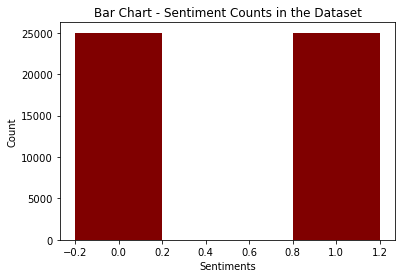

In [19]:
#Bar charts for sentiment counts

counts = data.sentiment.value_counts()
plt.bar(range(len(counts)), counts, color ='maroon', width = 0.4)
plt.xlabel("Sentiments") 
plt.ylabel("Count") 
plt.title("Bar Chart - Sentiment Counts in the Dataset") 

plt.show()

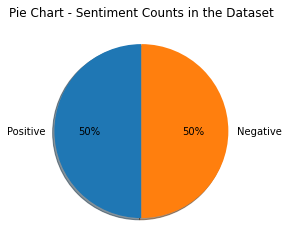

In [20]:
#Pie chart for sentiment counts

counts = df.sentiment.value_counts()
labels = 'Positive', 'Negative'
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%0.0f%%', shadow=True, startangle=90)  
plt.title("Pie Chart - Sentiment Counts in the Dataset")

plt.show()

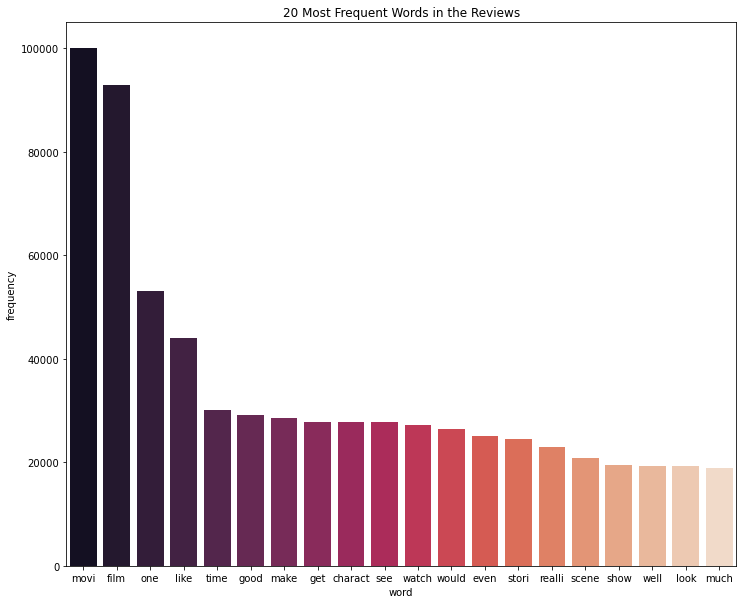

In [21]:
#Bar chart to show most frequent words in the reviews and their frequencies

cv = CountVectorizer()
cv_trans = cv.fit_transform(df.review)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(cv_trans.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20),columns = ['word', 'frequency'])

fig,ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="frequency", data=word_counter_df, palette="rocket", ax=ax).set_title("20 Most Frequent Words in the Reviews")

plt.show();

In [22]:
print(word_counter_df)

       word  frequency
0      movi     100013
1      film      92850
2       one      53143
3      like      44075
4      time      30167
5      good      29175
6      make      28634
7       get      27781
8   charact      27773
9       see      27714
10    watch      27261
11    would      26462
12     even      25018
13    stori      24448
14   realli      22993
15    scene      20879
16     show      19524
17     well      19332
18     look      19294
19     much      18980


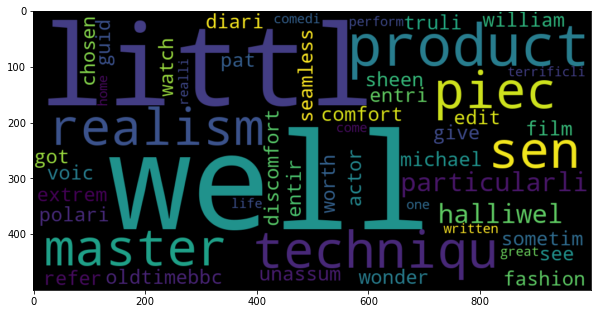

In [23]:
#word cloud for words in positive review 

plt.figure(figsize=(10,10))
positive_text = X_train[1]
wcl = WordCloud(width=1000,height=500,max_words=50,min_font_size=5)
positive_words = wcl.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')

plt.show()

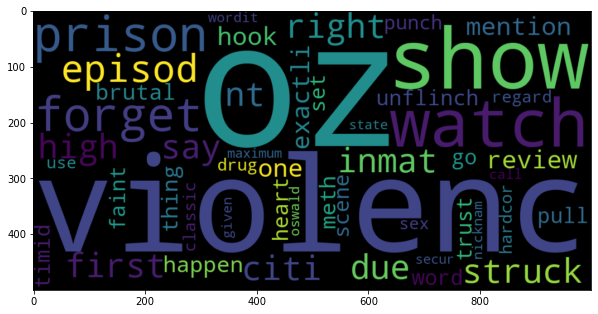

In [24]:
#word cloud for words in negative reviews

plt.figure(figsize=(10,10))
positive_text = X_train[0]
wc = WordCloud(width=1000, height=500, max_words=50, min_font_size=5)
positive_words = wc.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')

plt.show()

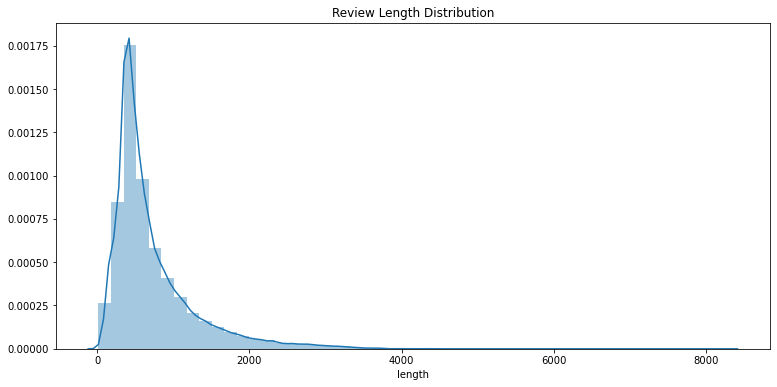

In [25]:
#Review Length Distribution

df['length'] = df['review'].str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(df['length']).set_title('Review Length Distribution');

In [26]:
#Number of reviews that is longer than 500 words

df_more100 = df[df['length'] > 500]
len(df_more100)

27069

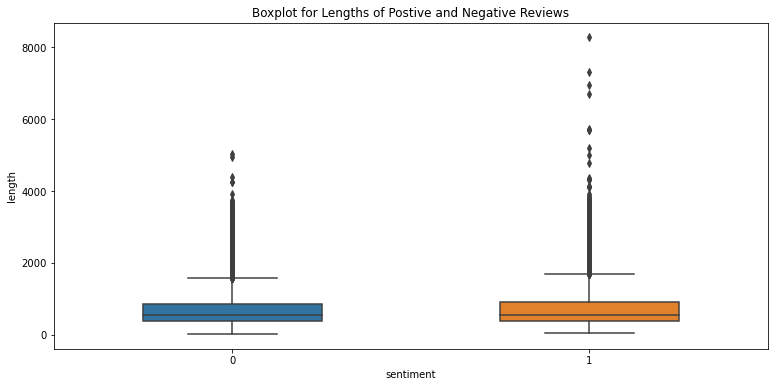

In [27]:
#Boxplot for Lengths of Postive and Negative Reviews

plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='sentiment', y='length', width=.5).set_title("Boxplot for Lengths of Postive and Negative Reviews");

Many outliers can be seen in this boxplot for review lengths. If review length is being used as 
a variable for prediction it has to be normalize to ge the values into the same range. In this prediction model building we have not taken review length as a variable.

# Models and Model Performances 

Naïve Bayes Model : IT18082234 - R.P.I. Udishan

In [28]:
#training the model
mnb=MultinomialNB()
#fitting the naive baise for tfidf features
mnb_tfidf=mnb.fit(vectorized_X_train,y_train)
print(mnb_tfidf)

MultinomialNB()


In [29]:
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(vectorized_X_test)
print(mnb_tfidf_predict)

[0 1 1 ... 1 0 1]


In [30]:
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test, mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_tfidf_score : 0.734


In [31]:
#Classification report for tfidf features
mnb_tfidf_report=classification_report(y_test,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.73      0.73      0.73      6265
    Negative       0.73      0.73      0.73      6235

    accuracy                           0.73     12500
   macro avg       0.73      0.73      0.73     12500
weighted avg       0.73      0.73      0.73     12500



In [32]:
#confusion matrix for tfidf features
cm_tfidf = confusion_matrix(y_test,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4573 1662]
 [1663 4602]]


K-NN Model : IT18032116 - K.B.S.K. Bandara

In [33]:
knn = KNeighborsClassifier(n_neighbors = 5)

#fitting the knn for tfidf features
knn_tfidf=knn.fit(vectorized_X_train,y_train)
print(knn_tfidf)

KNeighborsClassifier()


In [34]:
#Predicting the model for tfidf features
knn_tfidf_predict=knn.predict(vectorized_X_test)
print(knn_tfidf_predict)

[0 0 0 ... 0 0 0]


In [35]:
#Accuracy score for tfidf features
knn_tfidf_score=accuracy_score(y_test,knn_tfidf_predict)
print("knn_tfidf_score :",knn_tfidf_score)

knn_tfidf_score : 0.50232


In [36]:
#Classification report for tfidf features
knn_tfidf_report=classification_report(y_test,knn_tfidf_predict,target_names=['Positive','Negative'])
print(knn_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.50      0.87      0.64      6265
    Negative       0.50      0.13      0.21      6235

    accuracy                           0.50     12500
   macro avg       0.50      0.50      0.42     12500
weighted avg       0.50      0.50      0.42     12500



In [37]:
#confusion matrix for tfidf features
cm_tfidf_knn = confusion_matrix(y_test,knn_tfidf_predict,labels=[1,0])
print(cm_tfidf_knn)


[[ 818 5417]
 [ 804 5461]]


Support Vector Machine (SVM) Model : IT18054378 - W.A.T. Wickramaarachchi

In [38]:
#Initialize SVM classifier
svm_clf = LinearSVC()

In [39]:
#Fitting the svm for tfidf features
svm_fit = svm_clf.fit(vectorized_X_train, y_train)
print(svm_fit)

LinearSVC()


In [40]:
#Predict the test set
svm_model = svm_clf.predict(vectorized_X_test)
print(svm_model)

[0 1 1 ... 1 0 1]


In [41]:
#Accuracy score for tfidf features
svm_tfidf_score = accuracy_score(y_test, svm_model)
print("SVM tfidf score :", svm_tfidf_score)

SVM tfidf score : 0.73216


In [42]:
#Classification report for tfidf features
cr_svm_tfidf = classification_report(y_test, svm_model, target_names=['Positive','Negative'])
print(cr_svm_tfidf)

              precision    recall  f1-score   support

    Positive       0.72      0.76      0.74      6265
    Negative       0.75      0.70      0.72      6235

    accuracy                           0.73     12500
   macro avg       0.73      0.73      0.73     12500
weighted avg       0.73      0.73      0.73     12500



In [43]:
#confusion matrix for tfidf features
cm_svm_tfidf = confusion_matrix(y_test, svm_model, labels=[1,0])
print(cm_svm_tfidf)

[[4379 1856]
 [1492 4773]]


# Conclusion

By comparing confusion matrics and accuracies Naïve Bayes Model can be concluded as the best model out of the above three models, for this sentiment prediction.